In [ ]:
import os
import pandas as pd
from utils import DATASETS, plot_bar

plot_dir = f'../plot/others'
os.makedirs(plot_dir, exist_ok=True)

question_nums, testtaker_nums = [], []
for dataset in DATASETS:
    y = pd.read_csv(f'../data/pre_calibration/{dataset}/matrix.csv', index_col=0).values
    testtaker_nums.append(y.shape[0])
    question_nums.append(y.shape[1])

plot_bar(DATASETS, question_nums, f"{plot_dir}/question_nums.png", r"Number of Questions", exp_axis=True)
plot_bar(DATASETS, testtaker_nums, f"{plot_dir}/testtaker_nums.png", r"Number of Test Takers")

In [5]:

import pandas as pd
from utils import plot_corr, plot_corr_double
import os

plot_dir = f'../plot/overall'
os.makedirs(plot_dir, exist_ok=True)

nonamor4plugin_gof_train = pd.read_csv(f'../plot/nonamor_calibration/nonamor4plugin_gof_train.csv')["gof_means"].values
nonamor4plugin_gof_test = pd.read_csv(f'../plot/nonamor_calibration/nonamor4plugin_gof_test.csv')["gof_means"].values
nonamor4amor_gof_train = pd.read_csv(f'../plot/nonamor_calibration/nonamor4amor_gof_train.csv')["gof_means"].values
nonamor4amor_gof_test = pd.read_csv(f'../plot/nonamor_calibration/nonamor4amor_gof_test.csv')["gof_means"].values
amor_gof_train = pd.read_csv(f'../plot/amor_calibration/amor_single_gof_train.csv')["gof_means"].values
amor_gof_test = pd.read_csv(f'../plot/amor_calibration/amor_single_gof_test.csv')["gof_means"].values
plugin_gof_train = pd.read_csv(f'../plot/plugin_regression/plugin_single_gof_train.csv')["gof_means"].values
plugin_gof_test = pd.read_csv(f'../plot/plugin_regression/plugin_single_gof_test.csv')["gof_means"].values

nonamor_ctt = pd.read_csv(f'../plot/nonamor_calibration/nonamor_calibration_corr_ctt.csv')["corr_ctt_means"].values
amor_ctt = pd.read_csv(f'../plot/amor_calibration/amor_calibration_corr_ctt.csv')["corr_ctt_means"].values

nonamor_helm = pd.read_csv(f'../plot/nonamor_calibration/nonamor_calibration_corr_helm.csv')["corr_helm_means"].values
amor_helm = pd.read_csv(f'../plot/amor_calibration/amor_calibration_corr_helm.csv')["corr_helm_means"].values

plot_corr(
    data1=nonamor_ctt,
    data2=amor_ctt,
    plot_path=f"{plot_dir}/ctt_nonamor_amor.png",
    title=r'$\theta$ correlation with CTT',
    # title=r'$\theta$ correlation with CTT. $\rho$ = {:.2f}',
    xlabel=r"Traditional amortization",
    ylabel=r"Joint amortization",
)

plot_corr(
    data1=nonamor_helm,
    data2=amor_helm,
    plot_path=f"{plot_dir}/helm_nonamor_amor.png",
    title=r'$\theta$ correlation with HELM',
    # title=r'$\theta$ correlation with HELM. $\rho$ = {:.2f}',
    xlabel=r"Traditional amortization",
    ylabel=r"Joint amortization",
)

plot_corr_double(
    data1_train=nonamor4amor_gof_train,
    data1_test=nonamor4amor_gof_test,
    data2_train=amor_gof_train,
    data2_test=amor_gof_test,
    plot_path=f"{plot_dir}/gof_nonamor_amor.png",
    xlabel=r"Traditional amortization",
    ylabel=r"Joint amortization",
)

plot_corr_double(
    data1_train=nonamor4plugin_gof_train,
    data1_test=nonamor4plugin_gof_test,
    data2_train=plugin_gof_train,
    data2_test=plugin_gof_test,
    plot_path=f"{plot_dir}/gof_nonamor_plungin.png",
    xlabel=r"Traditional amortization",
    ylabel=r"Plug-in amortization",
)

In [2]:
import os
import pandas as pd
from sklearn.metrics import mean_squared_error

task_list = ['plugin_regression/aggregate_byrandom']
pattern = ['train', 'test']

directory = '../data/plugin_regression/aggregate_byrandom'
file_pattern = 'test'

concat_df = pd.DataFrame()
for filename in os.listdir(directory):
    if filename.startswith(file_pattern) and filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        concat_df = pd.concat([concat_df, df[['z_true', 'z_pred']]])

mse = mean_squared_error(concat_df['z_true'], concat_df['z_pred'])
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 161.60632292624604


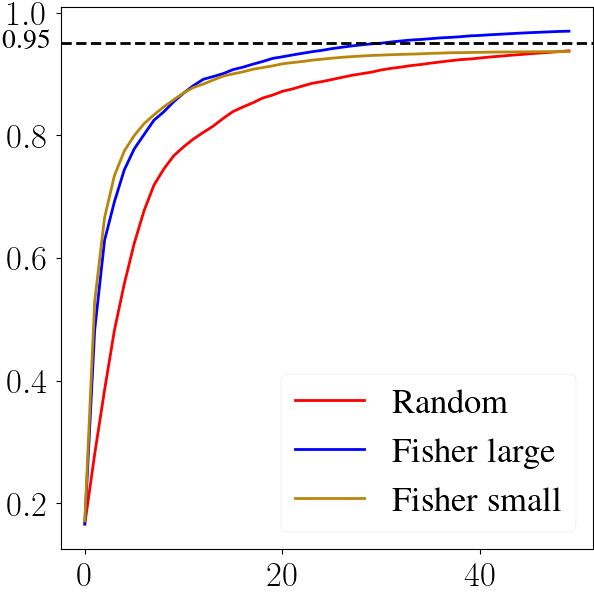

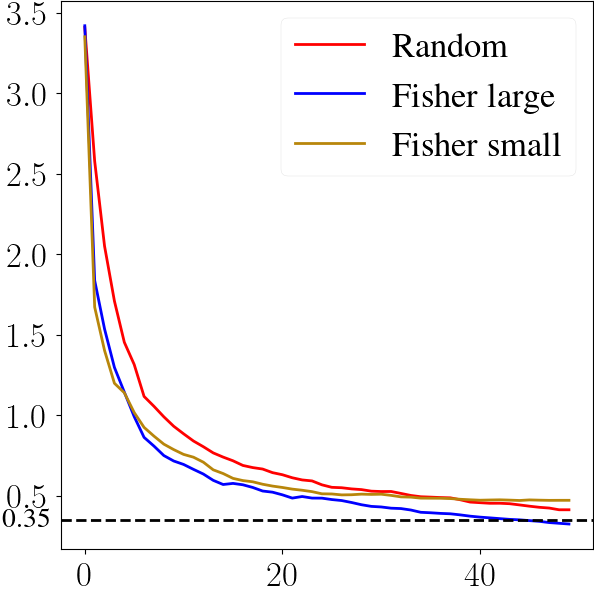

In [33]:
input_path1 = f'../data/catgt/cat_subset.csv'
input_path2 = f'../data/catgt/cat_full.csv'
input_df1 = pd.read_csv(input_path1)
input_df2 = pd.read_csv(input_path2)

cat_data = input_df2[input_df2['variant'] == 'CAT']
cat_reliability_list = cat_data['reliability'].tolist()
cat_mse_list = cat_data['mse'].tolist()

random_data = input_df2[input_df2['variant'] == 'Random']
random_reliability_list = random_data['reliability'].tolist()
random_mse_list = random_data['mse'].tolist()

subset_cat_data = input_df1[input_df1['variant'] == 'CAT']
subset_cat_reliability_list = subset_cat_data['reliability'].tolist()
subset_cat_mse_list = subset_cat_data['mse'].tolist()

plt.figure(figsize=(6, 6))
plt.plot(random_reliability_list, label='Random', color='red', linewidth=2)
plt.plot(cat_reliability_list, label='Fisher large', color='blue', linewidth=2)
plt.plot(subset_cat_reliability_list, label='Fisher small', color='darkgoldenrod', linewidth=2)
plt.tick_params(axis='both', labelsize=25)
plt.axhline(y=0.95, linestyle='--', color='black', linewidth=2)
plt.text(-0.02, 0.95, '0.95', verticalalignment='center', horizontalalignment='right', fontsize=20, transform=plt.gca().get_yaxis_transform())
plt.legend(fontsize=25)
plt.savefig('../plot/cat_subset_reliability', dpi=300, bbox_inches='tight')    

plt.figure(figsize=(6, 6))
plt.plot(random_mse_list, label='Random', color='red', linewidth=2)
plt.plot(cat_mse_list, label='Fisher large', color='blue', linewidth=2)
plt.plot(subset_cat_mse_list, label='Fisher small', color='darkgoldenrod', linewidth=2)
plt.tick_params(axis='both', labelsize=25)
plt.axhline(y=0.35, linestyle='--', color='black', linewidth=2)
plt.text(-0.02, 0.35, '0.35', verticalalignment='center', horizontalalignment='right', fontsize=20, transform=plt.gca().get_yaxis_transform())
plt.legend(fontsize=25)
plt.savefig('../plot/cat_subset_mse', dpi=300, bbox_inches='tight')    